In [1]:
library(readxl)
library(tidyverse)
library(janitor)
library(here)
library(gtsummary)
library(countdown)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /home/sand94/projects/rmedicine-data-cleaning-2023



In [2]:
excel_path <- here("data", "messy_uc.xlsx")
df_raw <- read_excel(
  path = excel_path,
  sheet = "Data",
  skip = 6
)

New names:
• `` -> `...7`


In [3]:
df_clean <- df_raw |> 
  janitor::clean_names() |> 
  janitor::remove_empty(which = c("rows", "cols"))

In [4]:
df_clean |> glimpse()

Rows: 30
Columns: 37
$ pat_id                           <chr> "001", "002", "003", "004", "005", "0…
$ treatment                        <chr> "upa", "uste", "oza", "upa", "oza", "…
$ start_date                       <dbl> 44208, 44215, 44230, 44245, 44255, 44…
$ ethnic                           <chr> "hispanic", "not hispanic", "not hisp…
$ race                             <chr> "Caucasian", "Caucasian", "African-Am…
$ dob                              <dttm> 2005-01-07, 1937-04-13, 1946-06-06, …
$ start_bp                         <chr> "114/72", "132/86", "124/92", "144/83…
$ pre_post_wt_kg                   <chr> "84/82", "77/77", "74/75", "66/65", "…
$ start_mes                        <dbl> 3, 2, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3…
$ start_bss                        <dbl> 75.85449, 54.65536, 28.46290, 77.2364…
$ start_abd_score                  <dbl> 76.80263, 53.56908, 30.82623, 77.7276…
$ start_sys                        <dbl> 81.63807, 53.39802, 29.50837, 79.0785…
$ start_coping     

In [5]:
df_clean |> count(ethnic)

ethnic,n
<chr>,<int>
Hispanic,1
NOT hispanic,1
hispamnic,1
hispanic,3
not hispanic,24


In [6]:
df_clean <- df_raw |> 
  janitor::clean_names() |> 
  janitor::remove_empty(which = c("rows", "cols")) |>
  mutate(
    ethnic_clean = case_when(
      ethnic %in%  c("hispanic", "Hispanic", "hispamnic") ~ "hispanic",
      ethnic %in%  c("NOT hispanic", "not hispanic") ~ "not hispanic",
      .default = ethnic
    )
  )

df_clean |> count(ethnic_clean, ethnic)

ethnic_clean,ethnic,n
<chr>,<chr>,<int>
hispanic,Hispanic,1
hispanic,hispamnic,1
hispanic,hispanic,3
not hispanic,NOT hispanic,1
not hispanic,not hispanic,24


In [7]:
df_clean <- df_raw |> 
  janitor::clean_names() |> 
  janitor::remove_empty(which = c("rows", "cols")) |> 
  mutate(
    race_clean = case_when(
      race %in% c("African-American", "afromerican") ~ "African-American",
      race %in% c("H/API", "Mixed", "Other") ~ "Other",
      .default = race
    )
  )

df_clean |> 
  count(race_clean, race)

race_clean,race,n
<chr>,<chr>,<int>
African-American,African-American,4
African-American,afromerican,2
AmerInd,AmerInd,1
Asian,Asian,1
Caucasian,Caucasian,17
Hawaiian,Hawaiian,1
Other,H/API,1
Other,Mixed,1
Other,Other,2


In [8]:
library(showtext) 
showtext_opts(dpi = 300)
showtext_auto(enable = TRUE)

Loading required package: sysfonts

Loading required package: showtextdb



In [9]:
# installing Cairo to produce ggplot figures resolves the low resolution font problem
options(repr.plot.res = 300)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


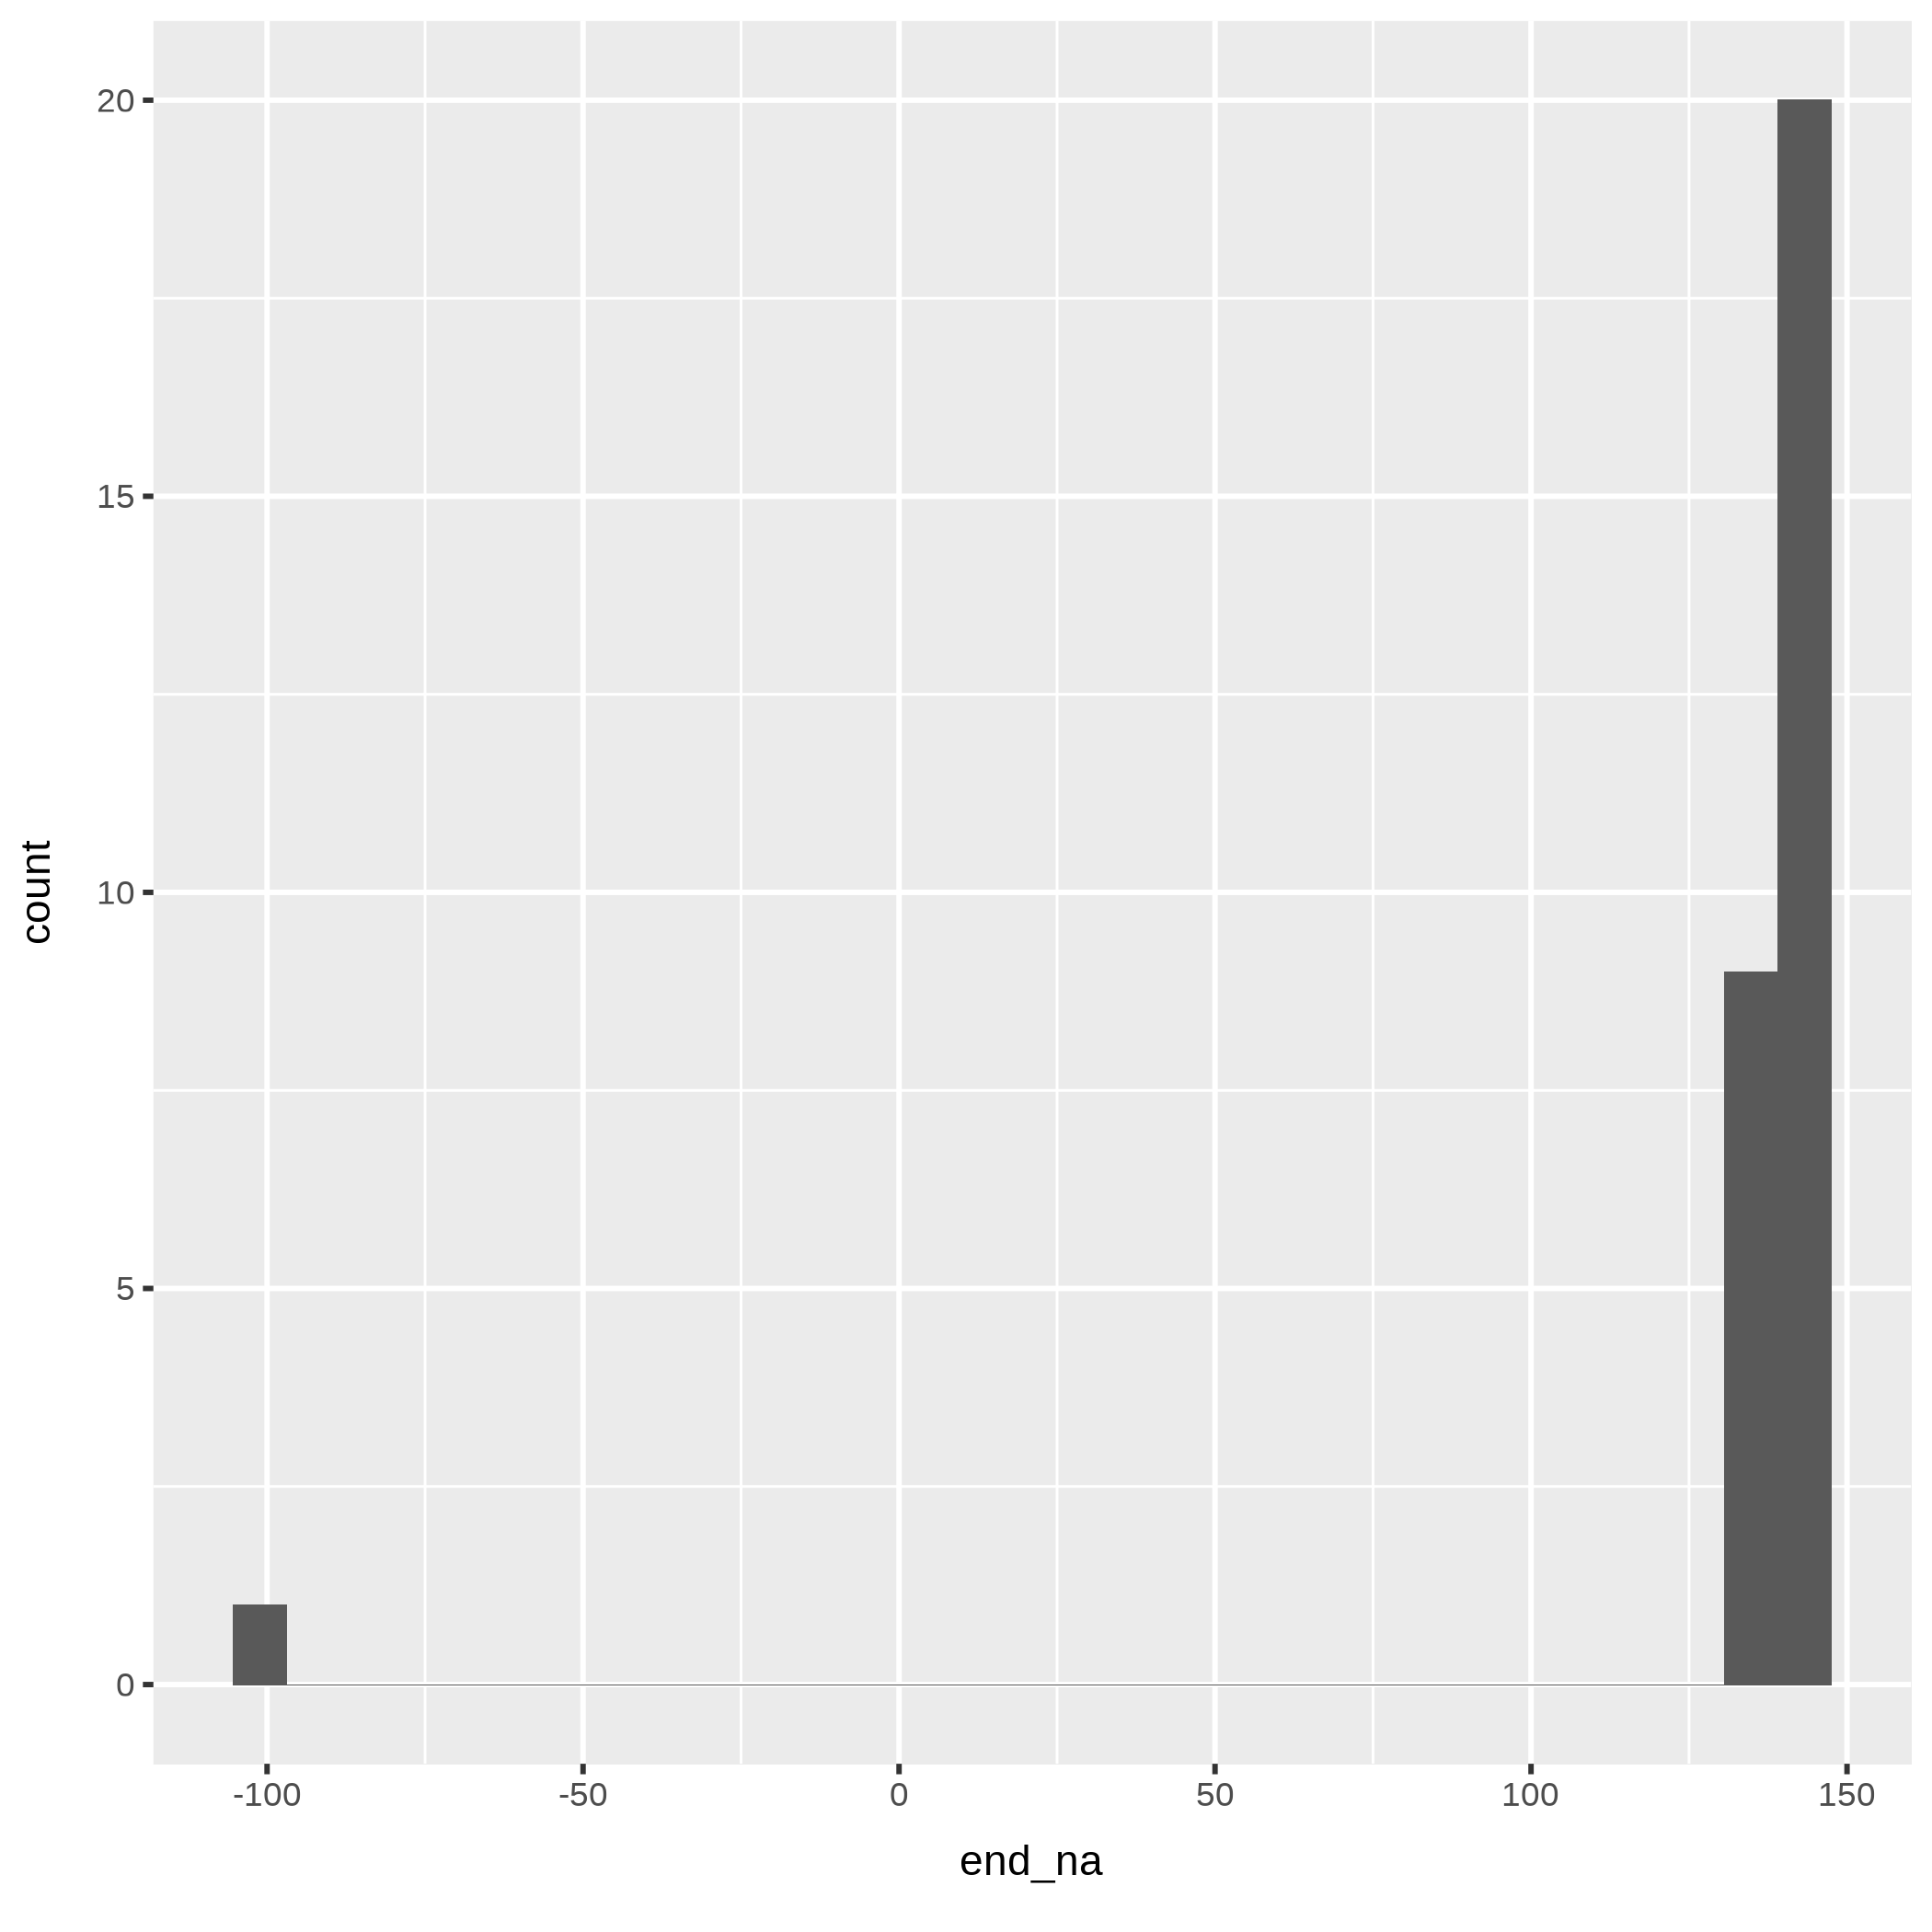

In [10]:
df_clean |> 
  ggplot(aes(x = end_na)) +
  geom_histogram()